In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("london_weekends.csv")

In [3]:
data.shape[0]

5379

## Drop unneccassary colomns

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
duplicates = data.duplicated().sum()
print("The number of duplicates are as :", duplicates)

The number of duplicates are as : 0


In [6]:
data.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [7]:
data.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

### Removing outliers 

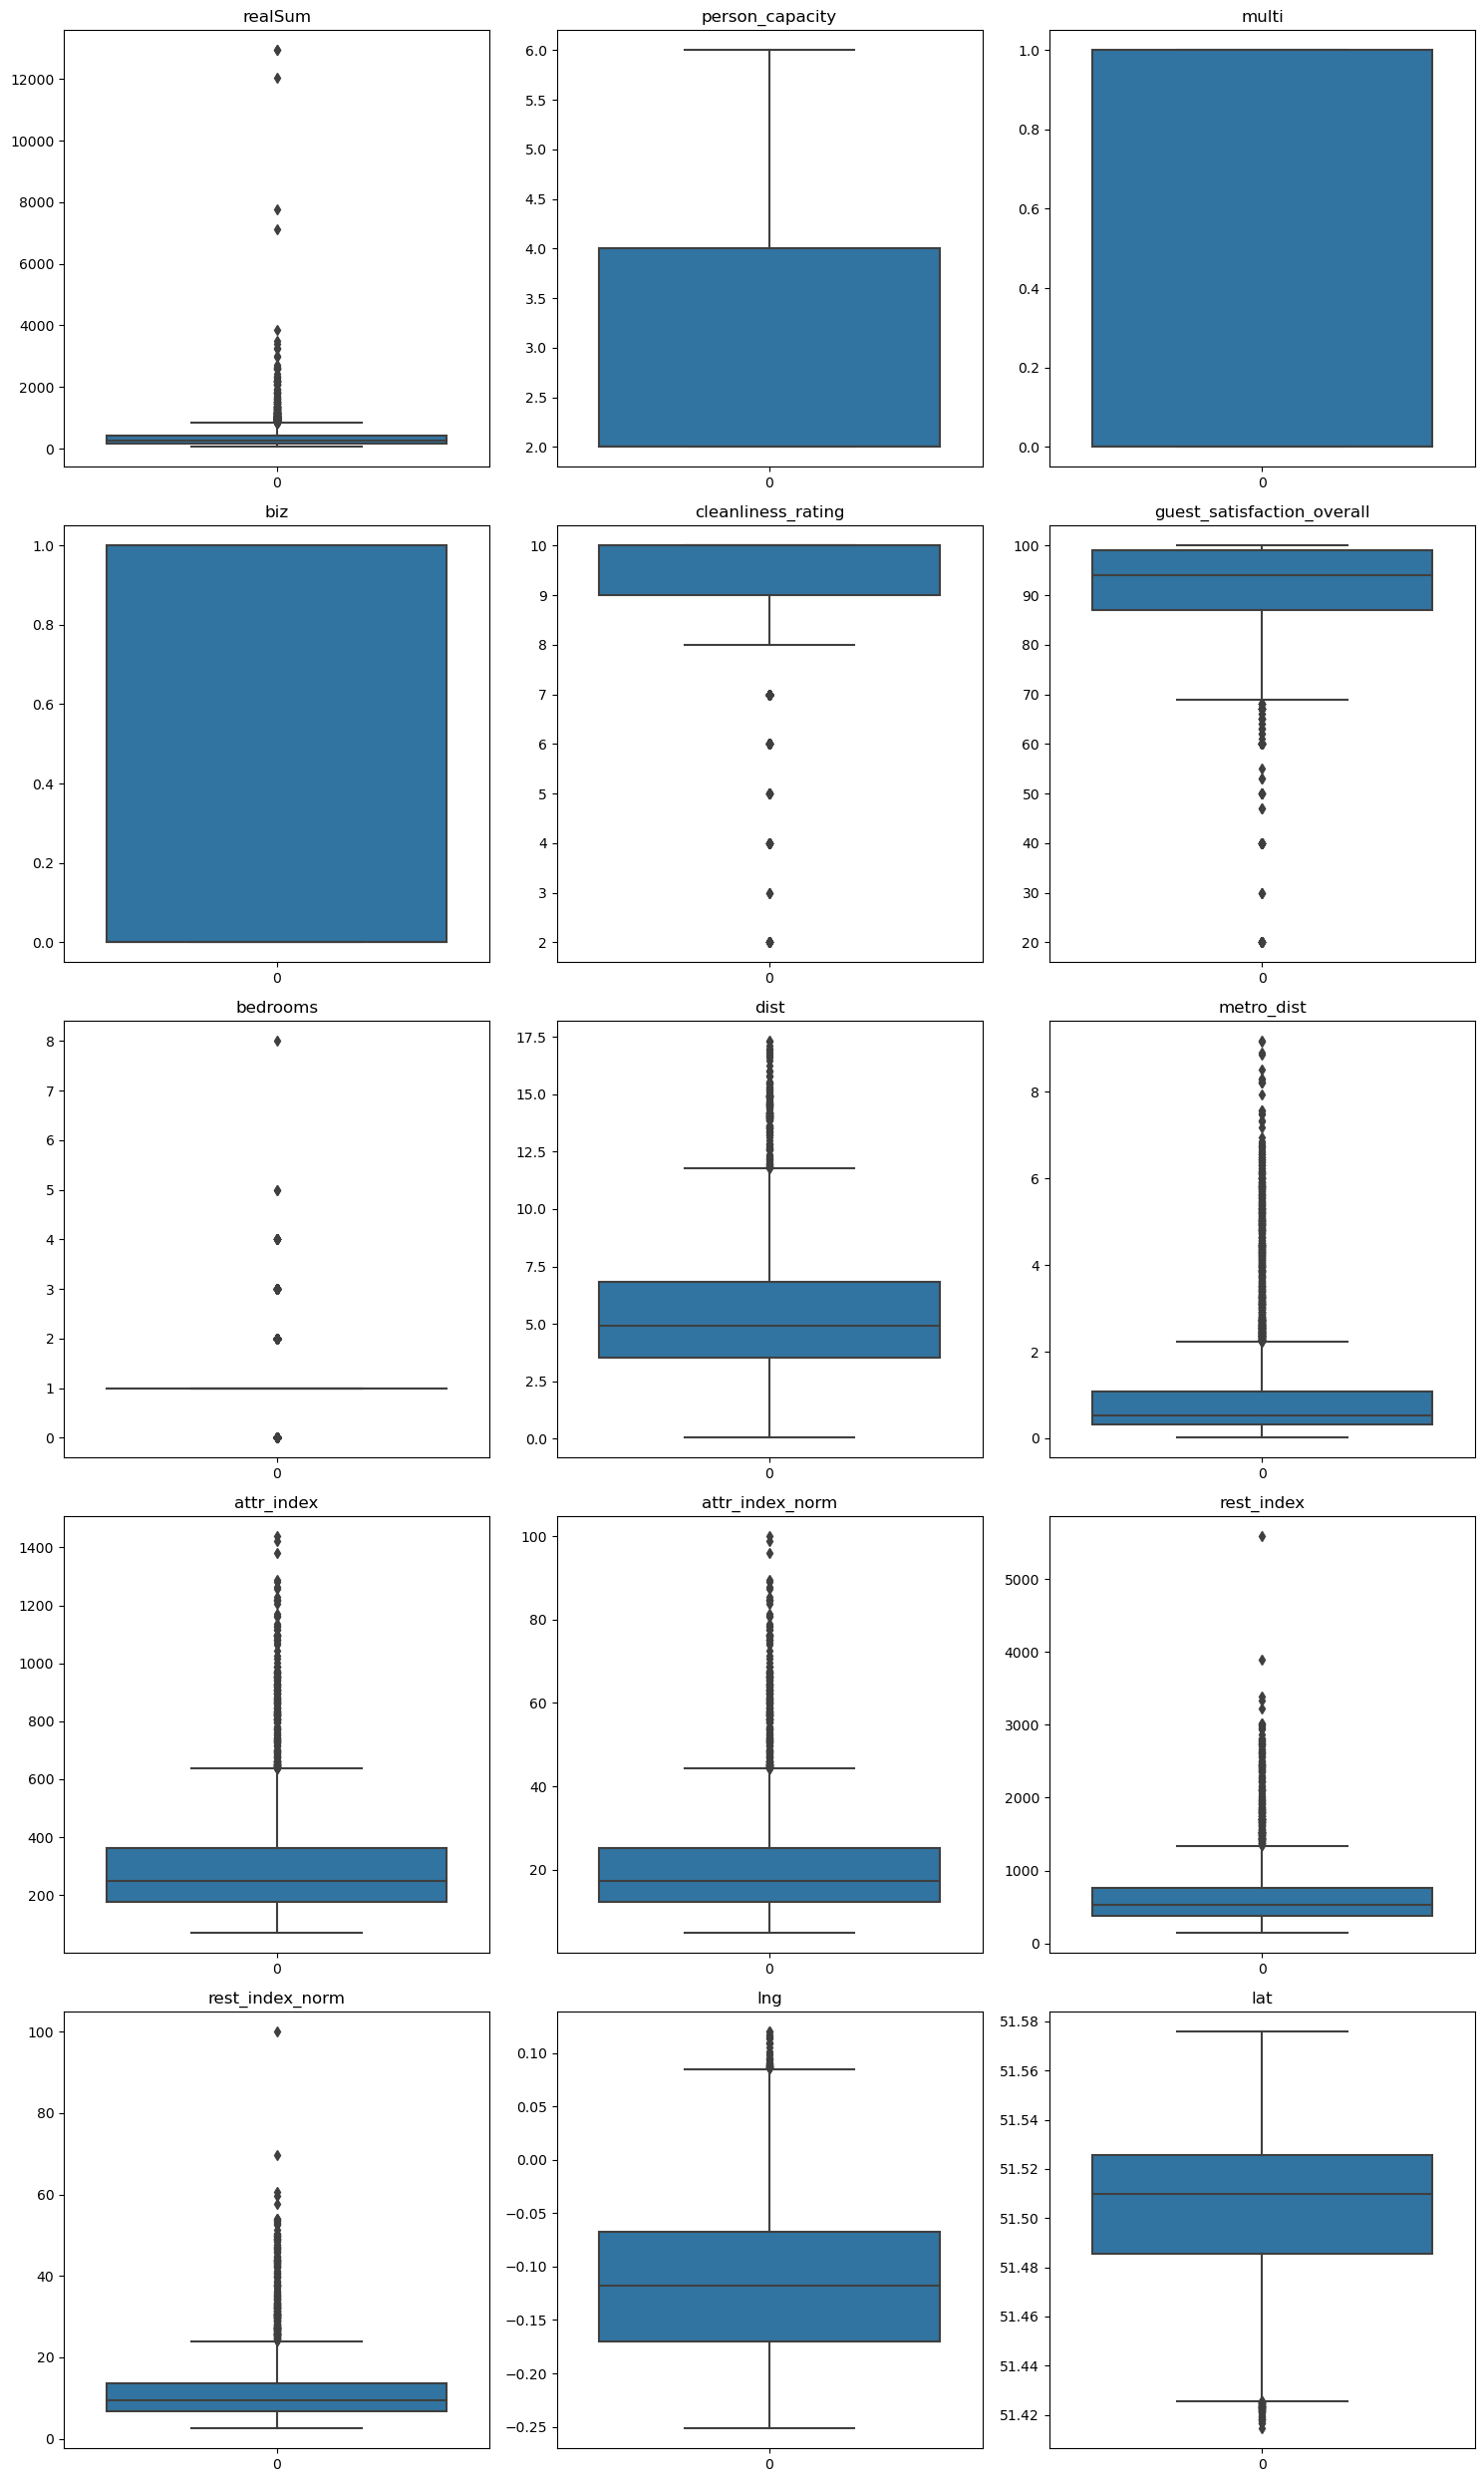

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'id']

num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)  

plt.figure(figsize=(15, 5*num_rows)) 
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i) 
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [9]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        IQR = Q3 - Q1
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data

numeric_columns = ['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

data = remove_outliers_iqr(data, numeric_columns)

print(data.head())

      realSum     room_type  room_shared  room_private  person_capacity  \
1  195.912416  Private room        False          True              2.0   
2  193.325337  Private room        False          True              3.0   
3  180.389943  Private room        False          True              2.0   
6  430.395823  Private room        False          True              2.0   
7  244.831722  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
1              False      1    0                10.0   
2              False      1    0                10.0   
3              False      1    0                 9.0   
6               True      0    1                10.0   
7              False      0    1                 9.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
1                        96.0         1  4.788905    1.464050  235.385841   
2                        95.0         1  4.596677    0.450

### Corelations with superhost

C:\Users\ramsh\AppData\Local\Temp\ipykernel_22748\4130705092.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_superhost = data.corr()['host_is_superhost'].abs().sort_values(ascending=False)


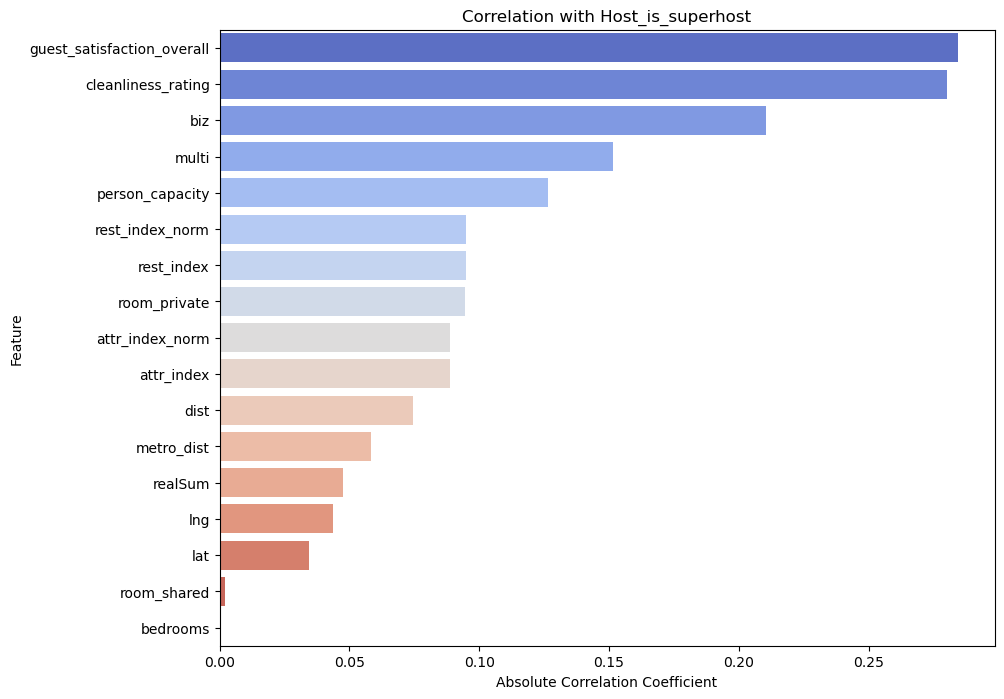

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_superhost = data.corr()['host_is_superhost'].abs().sort_values(ascending=False)

correlation_with_superhost = correlation_with_superhost.drop('host_is_superhost')

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_superhost.values, y=correlation_with_superhost.index, palette='coolwarm')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Feature')
plt.title('Correlation with Host_is_superhost')
plt.show()


In [11]:
data = pd.get_dummies(data, columns=['room_type'])

In [12]:
data.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,195.912416,False,True,2.0,False,1,0,10.0,96.0,1,...,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210,0,1,0
2,193.325337,False,True,3.0,False,1,0,10.0,95.0,1,...,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802,0,1,0
3,180.389943,False,True,2.0,False,1,0,9.0,87.0,1,...,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108,0,1,0
6,430.395823,False,True,2.0,True,0,1,10.0,97.0,1,...,0.253827,509.098946,35.389453,1071.720709,19.181933,-0.11023,51.52023,0,1,0
7,244.831722,False,True,2.0,False,0,1,9.0,88.0,1,...,0.546799,412.057147,28.643699,932.666193,16.693100,-0.11644,51.52905,0,1,0


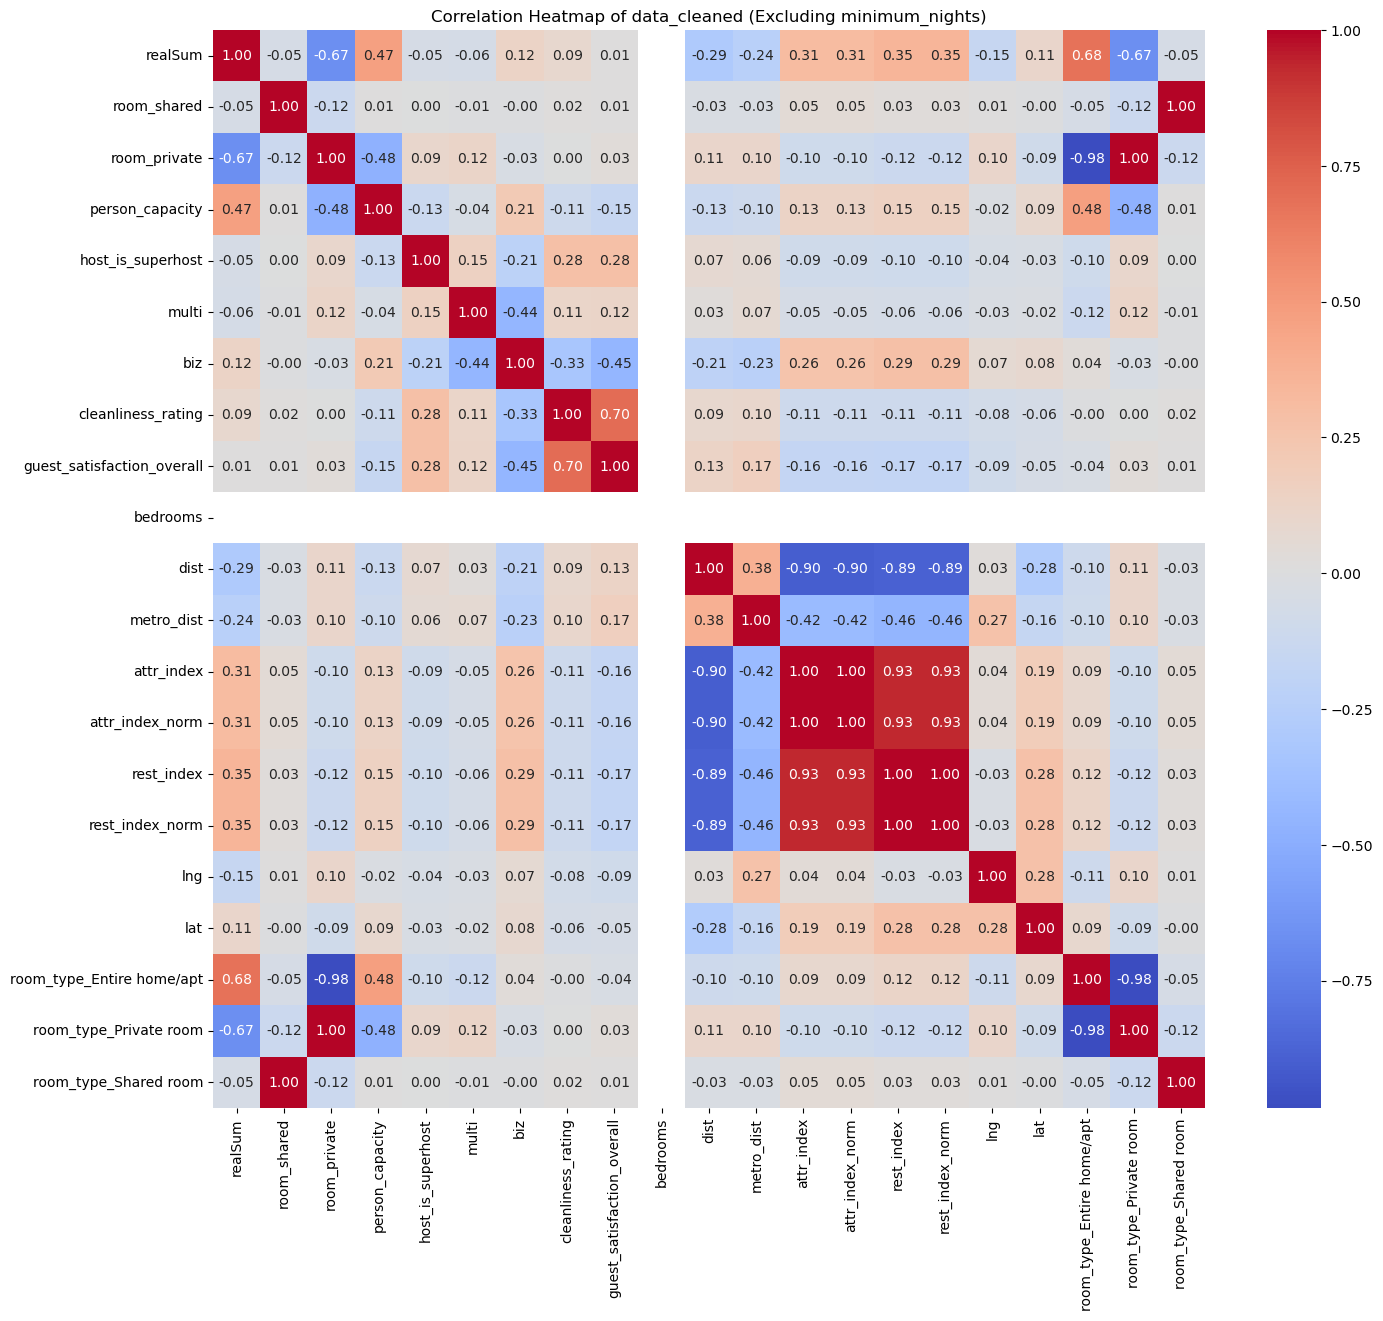

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 14))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of data_cleaned (Excluding minimum_nights)')
plt.show()

In [14]:
data.drop(columns=['room_shared','lng','bedrooms','room_private','biz','attr_index','rest_index_norm'], inplace=True)
data.head(4).transpose()

,1,2,3,6
realSum,195.912416,193.325337,180.389943,430.395823
person_capacity,2.0,3.0,2.0,2.0
host_is_superhost,False,False,False,True
multi,1,1,1,0
cleanliness_rating,10.0,10.0,9.0,10.0
guest_satisfaction_overall,96.0,95.0,87.0,97.0
dist,4.788905,4.596677,2.054769,1.787295
metro_dist,1.46405,0.450306,0.13267,0.253827
attr_index_norm,16.362588,18.693247,32.837067,35.389453
rest_index,530.133525,548.98761,1021.271062,1071.720709


In [15]:
host_distribution = data['host_is_superhost'].value_counts()

# Display the distribution
print(host_distribution) 

False    2478
True      582
Name: host_is_superhost, dtype: int64


In [16]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=42)

X = data.drop(columns=['host_is_superhost'])
y = data['host_is_superhost']

X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='host_is_superhost')], axis=1)

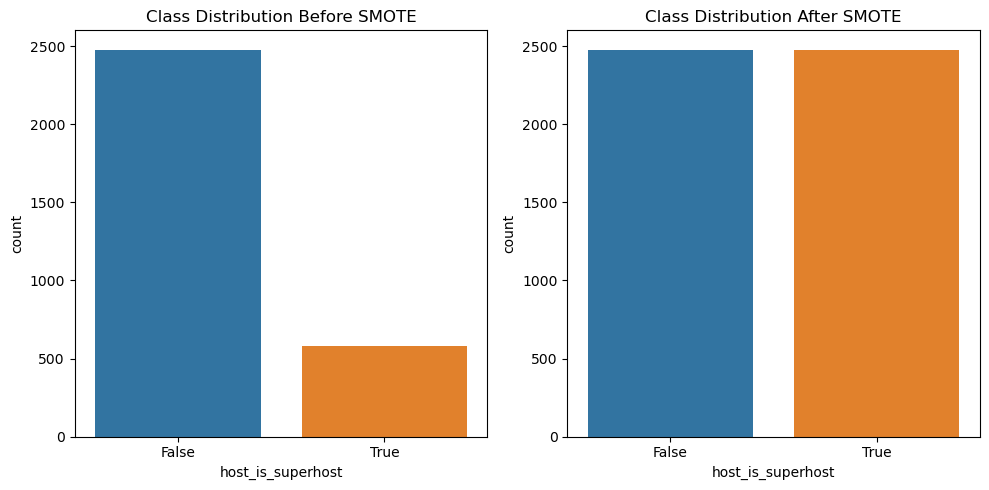

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='host_is_superhost')
plt.title('Class Distribution Before SMOTE')

# Plot the class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(data=resampled_df, x='host_is_superhost')
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

In [27]:
resampled_df.shape

(4956, 14)

### Modeling 

In [18]:
X = resampled_df.drop(columns=['host_is_superhost'])
y = resampled_df['host_is_superhost']

### RandomForestClassifier by  sklearn

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_sklearn = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_sklearn))

Accuracy: 0.8897108271687962
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.89      0.89       754
        True       0.88      0.89      0.89       733

    accuracy                           0.89      1487
   macro avg       0.89      0.89      0.89      1487
weighted avg       0.89      0.89      0.89      1487



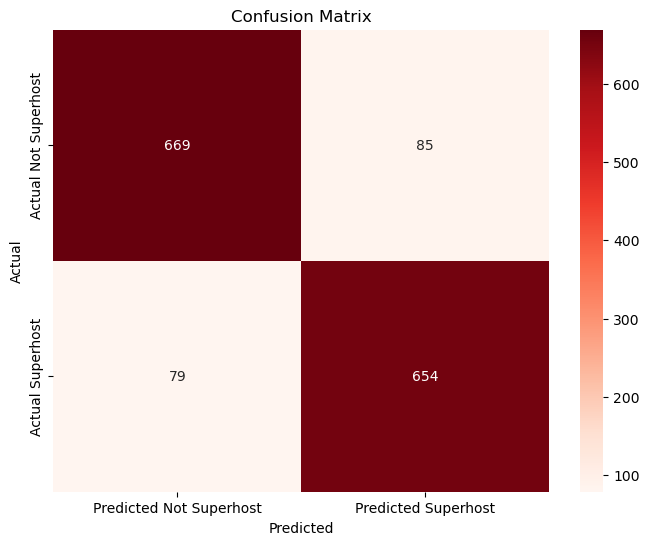

In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Predicted Not Superhost', 'Predicted Superhost'], yticklabels=['Actual Not Superhost', 'Actual Superhost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### XGBRFClassifier from xgboost

In [21]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


xgbrf_classifier = XGBRFClassifier(random_state=42)

xgbrf_classifier.fit(X_train, y_train)

y_pred_xgbrf = xgbrf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgbrf)
print("Accuracy with XGBRFClassifier:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgbrf))


Accuracy with XGBRFClassifier: 0.8459986550100874
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.84      0.85       754
        True       0.84      0.85      0.84       733

    accuracy                           0.85      1487
   macro avg       0.85      0.85      0.85      1487
weighted avg       0.85      0.85      0.85      1487



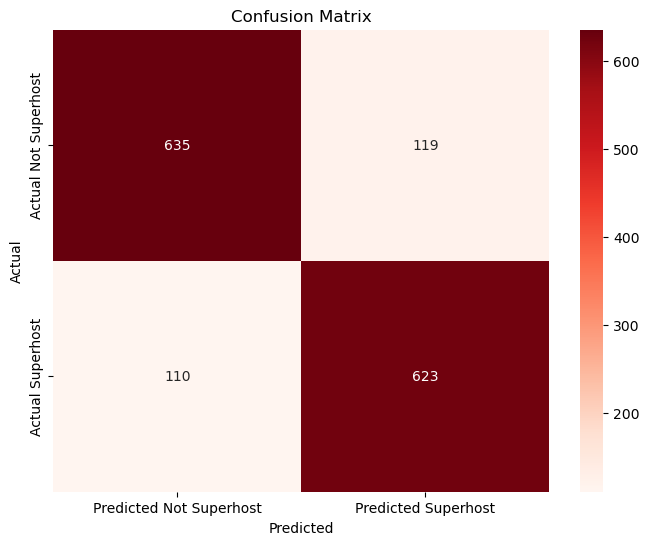

In [22]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgbrf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Predicted Not Superhost', 'Predicted Superhost'], yticklabels=['Actual Not Superhost', 'Actual Superhost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNeighborsClassifier from sklearn

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn_classifier_sklearn = KNeighborsClassifier(n_neighbors=11)

# Train the model
knn_classifier_sklearn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_sklearn_knn = knn_classifier_sklearn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_sklearn_knn)
print("Accuracy (using scikit-learn):", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_sklearn_knn))

Accuracy (using scikit-learn): 0.7686617350369872
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.64      0.74       754
        True       0.71      0.90      0.79       733

    accuracy                           0.77      1487
   macro avg       0.79      0.77      0.77      1487
weighted avg       0.79      0.77      0.77      1487



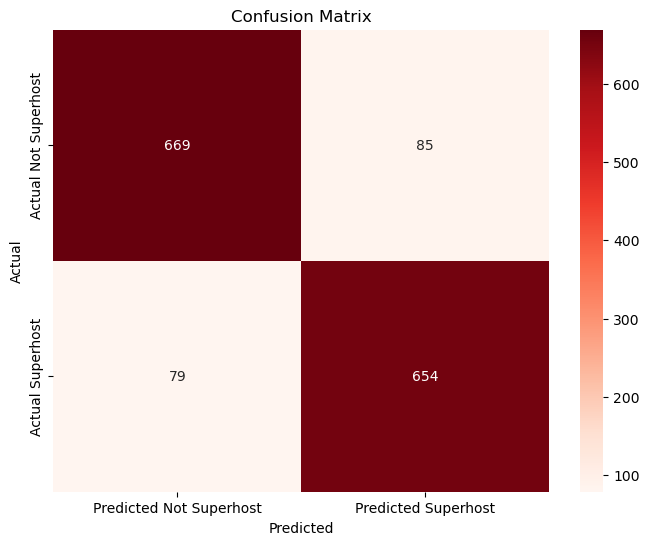

In [24]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Predicted Not Superhost', 'Predicted Superhost'], yticklabels=['Actual Not Superhost', 'Actual Superhost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNN from pyod

In [25]:
from pyod.models.knn import KNN 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn_classifier_pyod = KNN()

knn_classifier_pyod.fit(X_train_scaled)

y_pred = knn_classifier_pyod.predict(X_test_scaled)

y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy (using PyOD's k-NN):", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy (using PyOD's k-NN): 0.4519166106254203
Classification Report:
              precision    recall  f1-score   support

       False       0.48      0.85      0.61       754
        True       0.22      0.04      0.07       733

    accuracy                           0.45      1487
   macro avg       0.35      0.45      0.34      1487
weighted avg       0.35      0.45      0.34      1487



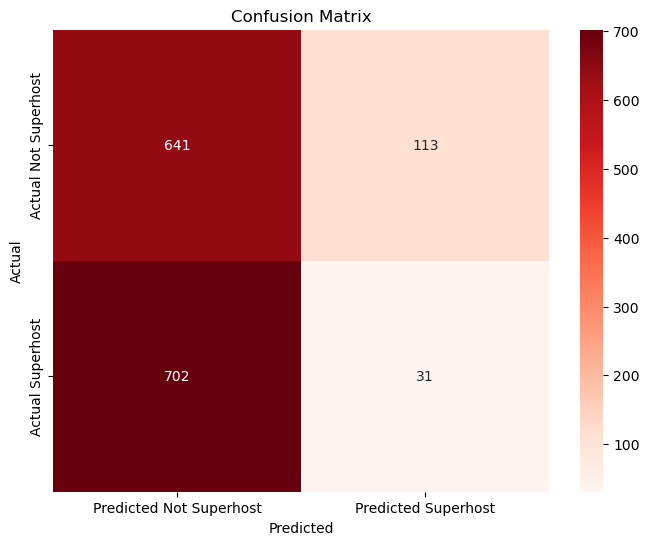

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Predicted Not Superhost', 'Predicted Superhost'], yticklabels=['Actual Not Superhost', 'Actual Superhost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()